<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/content/train.csv')
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


# Preprocessing

In [4]:
df.shape

(1599, 563)

In [5]:
# checking for null values
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64

In [6]:
# Remove rows with any missing or null values
df.dropna()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.296366,-0.052498,-0.148686,0.172733,0.238487,-0.153261,0.100727,0.127813,-0.197133,0.545983,...,-0.795388,-0.181817,-0.312392,0.980453,-0.933069,-0.863039,0.190899,0.037860,7.0,WALKING_DOWNSTAIRS
1594,0.242823,0.034320,-0.116451,0.168381,0.292292,-0.106097,0.074293,0.252687,-0.164878,0.545983,...,-0.578866,0.266780,0.748680,0.529669,0.051651,-0.841558,0.203762,0.048084,7.0,WALKING_DOWNSTAIRS
1595,0.356782,0.008701,-0.100455,0.193239,0.199739,-0.090917,0.159059,0.089385,-0.131139,0.545834,...,-0.681376,-0.459355,-0.749189,0.744093,0.184135,-0.856922,0.192837,0.047745,7.0,WALKING_DOWNSTAIRS
1596,0.318781,-0.035742,-0.062327,0.191585,-0.007497,-0.225497,0.135410,-0.151377,-0.247878,0.457749,...,-0.673839,-0.298579,0.571708,-0.841205,-0.798404,-0.877086,0.180432,0.040209,7.0,WALKING_DOWNSTAIRS


In [7]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64

In [8]:
df.shape

(1599, 563)

<Axes: xlabel='Activity', ylabel='count'>

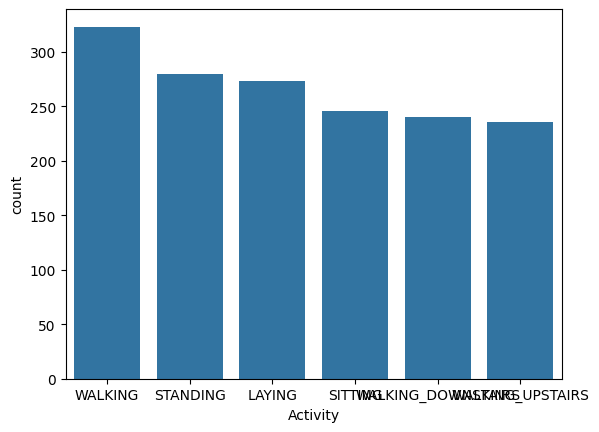

In [9]:
sns.countplot(x=df["Activity"],order=df["Activity"].value_counts().index)

# Label Encoder

In [10]:
#Encoding Activity column from categorical to numerical values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Create a label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


print(label_mapping)
print()
df.head(5)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5, nan: 6}



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,2


# Calculating Z-Score

In [11]:
from scipy.stats import zscore

# Calculate z-scores for each feature independently
z_scores = np.abs(zscore(df, axis=0))

# Define feature-specific thresholds (adjust as needed)
feature_thresholds = np.ones_like(z_scores) * 3

# Create a mask indicating outliers for each feature
outlier_mask = (z_scores > feature_thresholds)

# Remove rows containing outliers in any feature
df_no_out = df[~outlier_mask.any(axis=1)]

# Optionally, print the number of rows removed
print(f"Number of rows removed: {len(df) - len(df_no_out)}")


Number of rows removed: 98


# features and target variables

In [12]:
X = df_no_out.drop('Activity', axis=1)  # Exclude the target variable
y = df_no_out['Activity']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

# PCA

In [14]:
# Create a PCA object
pca = PCA(n_components=X_std.shape[1])  # Use the maximum number of components initially

# Fit the PCA model
pca.fit(X_std)

# Identify the number of components needed for a certain level of cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance_threshold = 0.70  # Adjust as needed

# Find the index where cumulative explained variance exceeds the threshold
num_components_needed = np.argmax(cumulative_explained_variance >= desired_variance_threshold) + 1

# Use the identified number of components for further analysis or dimensionality reduction
pca_final = PCA(n_components=num_components_needed)
X_pca = pca_final.fit_transform(X_std)

# Print the number of components needed
print(f"Number of components needed: {num_components_needed}")
print(X_pca)

Number of components needed: 9
[[-18.44846615   1.76511138   0.31102537 ...   1.39149491  -4.70312297
   -1.61558818]
 [-17.87169355   0.85877795  -0.12178363 ...   0.20406211  -0.2742637
   -0.7054108 ]
 [-17.55666387   1.97175358  -0.53182071 ...  -0.17774446   0.33941705
   -1.03496037]
 ...
 [ 27.58027181   4.04581586   2.83555202 ...  -3.90117383   1.50761824
    0.44917046]
 [ 26.18250896   5.70656185   4.46405818 ...  -4.1778897    3.77946704
    1.21750505]
 [ 22.71190968   7.30716439   8.45631067 ...  -6.43231885   3.27265162
    4.14638462]]


# creating a new Dataframe using PCA results

In [15]:
# Create a DataFrame with PCA results
data_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

data_result = pd.concat([data_pca, df_no_out['Activity']], axis=1)

In [16]:
data_result.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Activity
0,-18.448466,1.765111,0.311025,2.624513,-4.787994,9.459252,1.391495,-4.703123,-1.615588,2.0
1,-17.871694,0.858778,-0.121784,-2.502728,-1.797974,5.047578,0.204062,-0.274264,-0.705411,2.0
2,-17.556664,1.971754,-0.531821,-3.954744,-1.249040,5.161225,-0.177744,0.339417,-1.034960,2.0
3,-17.647499,3.459730,-1.057744,-3.142944,-0.972069,4.312437,0.571057,-0.900343,-0.384119,2.0
4,-18.044177,4.278553,-0.974596,-3.281197,-0.033623,3.677438,0.314596,1.533917,0.288917,2.0


# Preprocessing of new dataframe     data_result

In [17]:
data_result.dropna()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Activity
0,-18.448466,1.765111,0.311025,2.624513,-4.787994,9.459252,1.391495,-4.703123,-1.615588,2.0
1,-17.871694,0.858778,-0.121784,-2.502728,-1.797974,5.047578,0.204062,-0.274264,-0.705411,2.0
2,-17.556664,1.971754,-0.531821,-3.954744,-1.249040,5.161225,-0.177744,0.339417,-1.034960,2.0
3,-17.647499,3.459730,-1.057744,-3.142944,-0.972069,4.312437,0.571057,-0.900343,-0.384119,2.0
4,-18.044177,4.278553,-0.974596,-3.281197,-0.033623,3.677438,0.314596,1.533917,0.288917,2.0
...,...,...,...,...,...,...,...,...,...,...
1496,28.052809,-0.240213,0.333752,2.703337,2.566848,1.208580,-3.548768,2.944741,-2.466524,2.0
1497,31.648336,5.124491,1.261590,3.772693,1.579673,3.613497,-2.692526,3.062557,0.815903,2.0
1498,27.580272,4.045816,2.835552,3.855443,2.509525,4.055515,-3.901174,1.507618,0.449170,2.0
1499,26.182509,5.706562,4.464058,4.111631,4.379735,4.126836,-4.177890,3.779467,1.217505,2.0


In [18]:
# Drop rows with missing values
data_result = data_result.dropna()

# or fill missing values with a specific strategy
data_result = data_result.fillna(data_result.mean())  # Example: replace NaN with mean

# Replace infinite values with a large finite value
data_result.replace([np.inf, -np.inf], np.nan, inplace=True)
data_result.dropna(inplace=True)

In [19]:
data_result.shape

(1407, 10)

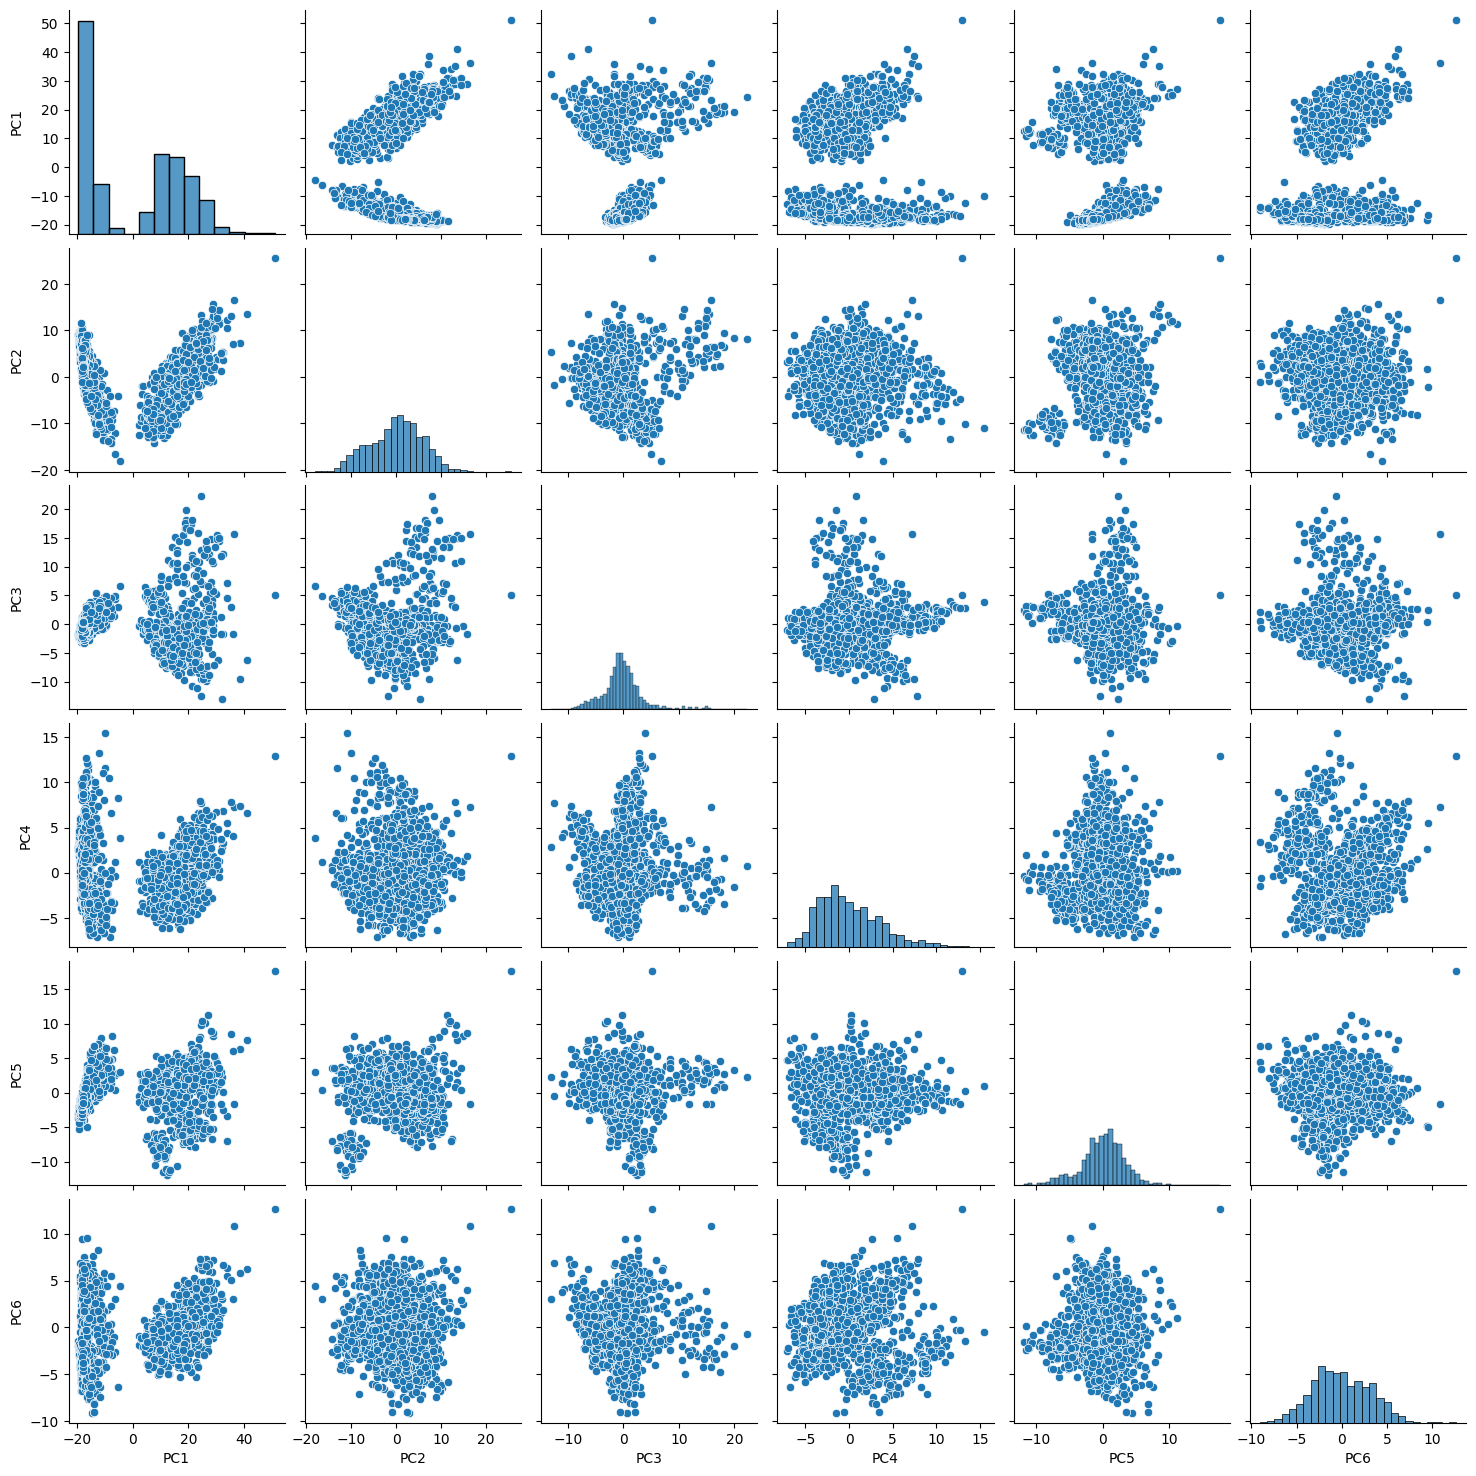

In [20]:
# Create a pairplot for a subset of features (adjust as needed)
subset_of_features = data_result.iloc[:, :6]  # Select the first 6 features for illustration
sns.pairplot(subset_of_features)
plt.show()

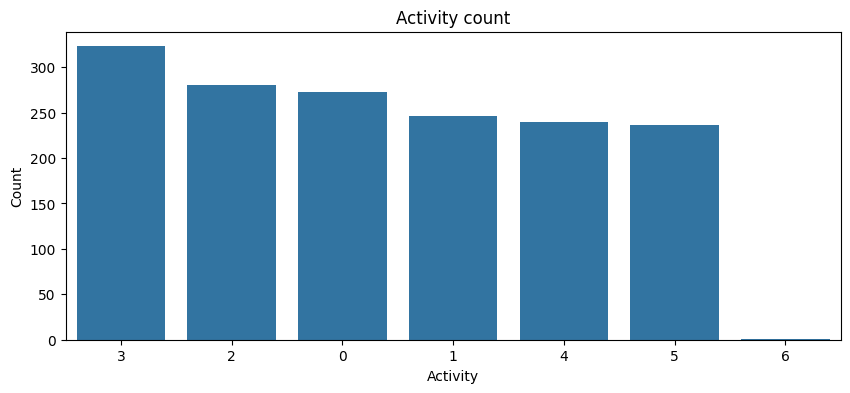

In [21]:
# Count the occurrences of each class
class_counts = df["Activity"].value_counts()

# Plotting the count of classes
plt.figure(figsize=(10, 4))
sns.countplot(x=df["Activity"], data=df, order=class_counts.index)
plt.title('Activity count')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

# VIF  (Variance Inflation Factor)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = data_result.columns
vif_data["VIF"] = [variance_inflation_factor(data_result.values, i) for i in range(data_result.shape[1])]

print(vif_data)


   Variable       VIF
0       PC1  1.000643
1       PC2  1.014259
2       PC3  1.011414
3       PC4  1.002397
4       PC5  1.010253
5       PC6  1.004009
6       PC7  1.001670
7       PC8  1.010373
8       PC9  1.001179
9  Activity  1.048359


# Skewness of columns

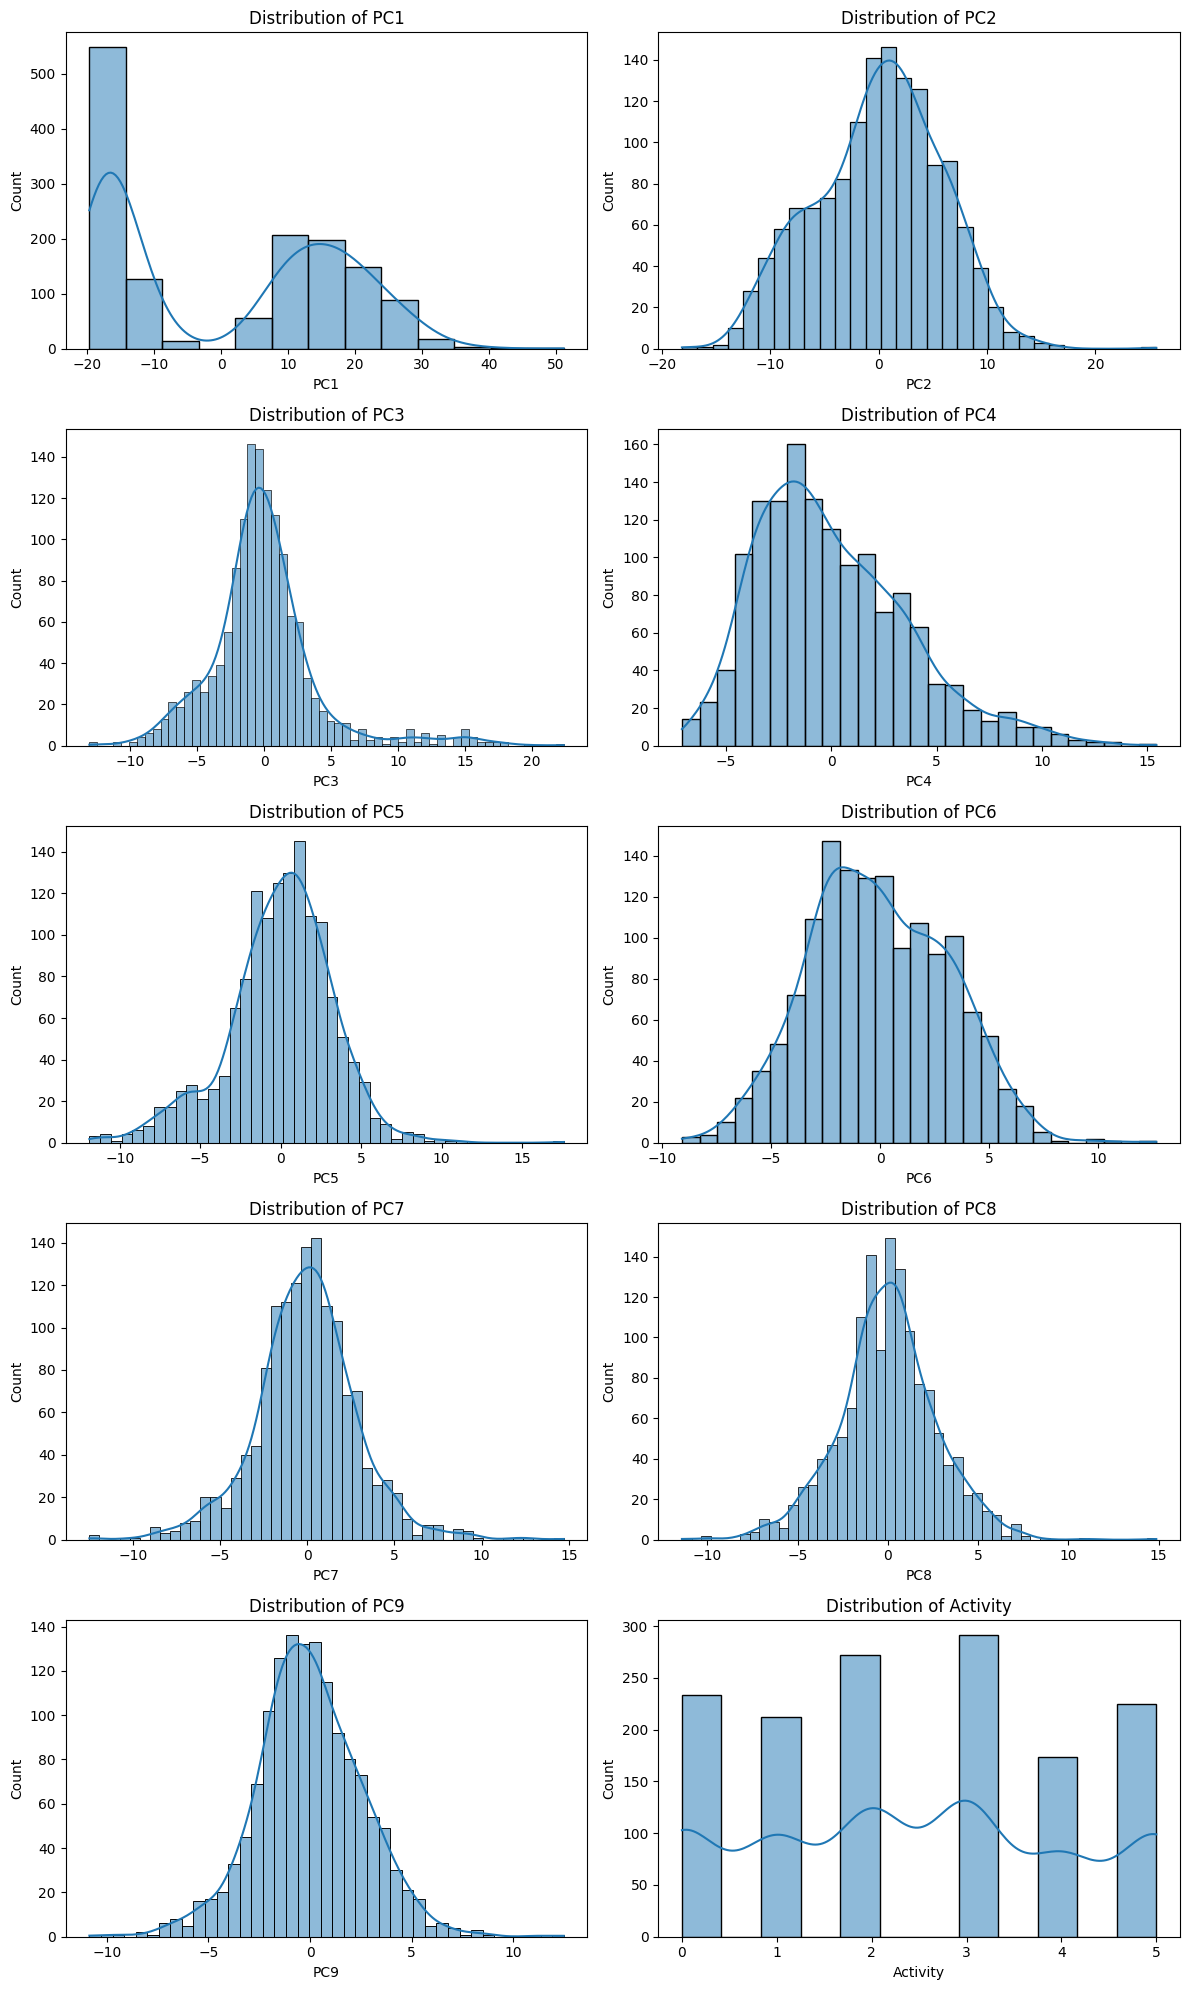

In [23]:
# Function to plot histograms for skewed columns
def plot_skewness(data_result):
    # Identify numerical columns
    numeric_cols = data_result.select_dtypes(include=[np.number]).columns

    # Set up subplots with a maximum of 2 columns
    n_rows = int(np.ceil(len(numeric_cols) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Plot histograms
    for i, col in enumerate(numeric_cols):
        sns.histplot(data_result[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_skewness(data_result)

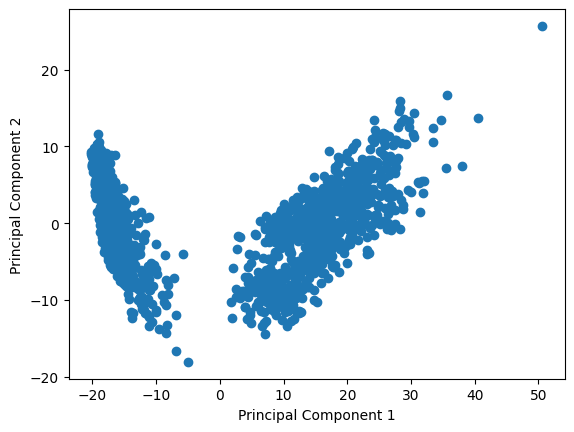

In [24]:
from sklearn.decomposition import PCA

# Assuming 'df' is your high-dimensional dataset
pca = PCA(n_components=2)  # Adjust the number of components
pca_result = pca.fit_transform(data_result)

# Create a scatter plot for the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Correlation Matrix

In [25]:
# Assuming 'data_result' is your DataFrame with high-dimensional data
correlation_matrix = data_result.corr()

# Display the correlation matrix or plot a heatmap
print(correlation_matrix)

               PC1       PC2       PC3       PC4       PC5       PC6  \
PC1       1.000000 -0.009740 -0.007401 -0.005946 -0.000035  0.020320   
PC2      -0.009740  1.000000  0.002885  0.002433  0.006554 -0.002465   
PC3      -0.007401  0.002885  1.000000 -0.000786 -0.013719 -0.001315   
PC4      -0.005946  0.002433 -0.000786  1.000000  0.011416  0.005612   
PC5      -0.000035  0.006554 -0.013719  0.011416  1.000000 -0.003849   
PC6       0.020320 -0.002465 -0.001315  0.005612 -0.003849  1.000000   
PC7      -0.003650 -0.008714 -0.008244 -0.031147  0.001873 -0.015024   
PC8      -0.005102 -0.007330  0.014922  0.022682 -0.014601  0.021054   
PC9       0.003757  0.025038 -0.001987  0.001818 -0.001642  0.005332   
Activity -0.038475 -0.194993  0.206631 -0.058039 -0.168039  0.133659   

               PC7       PC8       PC9  Activity  
PC1      -0.003650 -0.005102  0.003757 -0.038475  
PC2      -0.008714 -0.007330  0.025038 -0.194993  
PC3      -0.008244  0.014922 -0.001987  0.206631  
PC4

# Correlation Matrix Heatmap

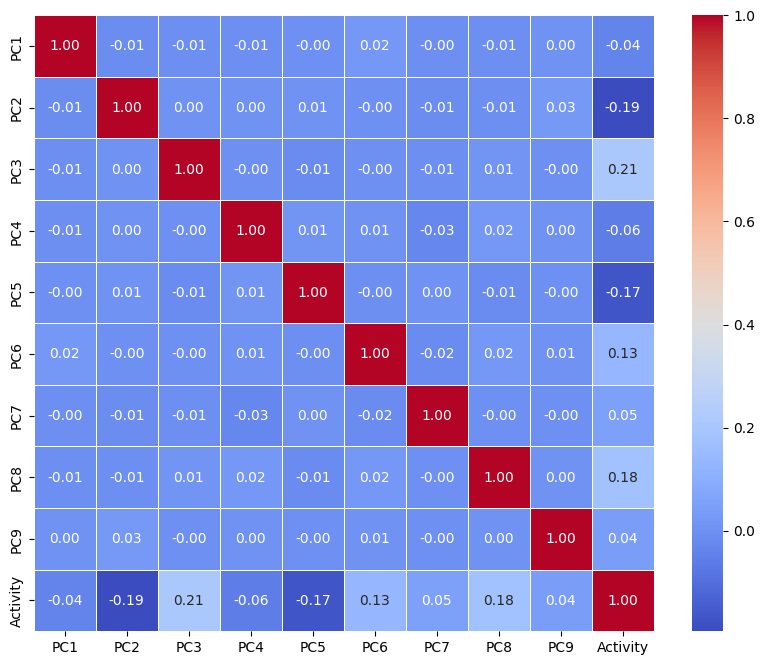

In [27]:
# Create a correlation matrix
correlation_matrix = data_result.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
model = LogisticRegression()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.38652482269503546
Confusion Matrix:
[[18  5  4  8  3  2]
 [ 5 12 21  6  1  2]
 [ 1  6 32  3  2  7]
 [14  0  7 33  1 10]
 [ 5  3  5 11  5  3]
 [ 0  7 23  6  2  9]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.45      0.43        40
         1.0       0.36      0.26      0.30        47
         2.0       0.35      0.63      0.45        51
         3.0       0.49      0.51      0.50        65
         4.0       0.36      0.16      0.22        32
         5.0       0.27      0.19      0.22        47

    accuracy                           0.39       282
   macro avg       0.38      0.36      0.35       282
weighted avg       0.38      0.39      0.37       282



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Assume the last column is the target variable (label)
X = data_result.iloc[:, :-1]  # Features
y = data_result.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.74
Confusion Matrix:
[[34  0  7  0  0  0  0  5]
 [ 0 44  2  1  0  1  0  6]
 [ 9  0 47  0  0  1  0  4]
 [ 1  0  0 13  0  0  1  1]
 [ 3  0  2  0  5  0  0  0]
 [ 0  1  6  0  0 25  0  3]
 [ 0  0  0  1  0  0  3  0]
 [ 4  8  5  2  0  0  0 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        46
           1       0.83      0.81      0.82        54
           2       0.68      0.77      0.72        61
           3       0.76      0.81      0.79        16
           4       1.00      0.50      0.67        10
           5       0.93      0.71      0.81        35
           6       0.75      0.75      0.75         4
           7       0.66      0.66      0.66        56

    accuracy                           0.74       282
   macro avg       0.78      0.72      0.74       282
weighted avg       0.75      0.74      0.74       282



# KNN  (K-Nearest Neighbors)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
X = data_result.iloc[:, :-1]
y = data_result.iloc[:, -1]

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize the KNN classifier ( 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 64.89%


# K-Means Algorithm

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
X = data_result.iloc[:, :-1]
y = data_result.iloc[:, -1]

In [35]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

In [36]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [37]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_pca)
    wcss.append(kmeans.inertia_)

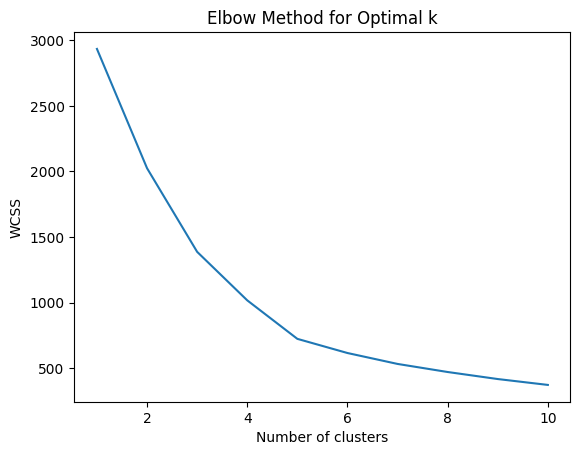

In [39]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [40]:
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_pca)

In [41]:
# Add the cluster labels to the original dataset
data_result['cluster'] = cluster_labels

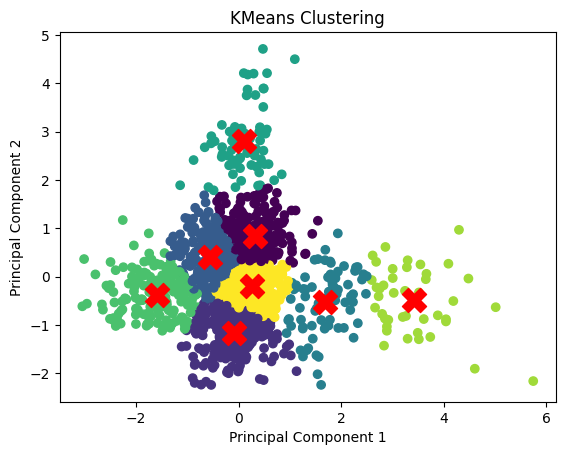

In [42]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()